In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = './ex1data1.txt'

data = pd.read_csv(path, header = None, names = ['Population', 'Profit'])
data.head() # 默认查看前5行数据

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [2]:
data.describe() # 查看数据整体的描述

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<AxesSubplot:xlabel='Population', ylabel='Profit'>

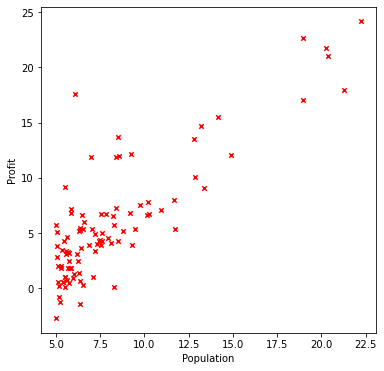

In [3]:
data.plot(kind = 'scatter', color = 'red', marker = 'x', x = 'Population', y = 'Profit', figsize = (6, 6))

In [4]:
data.insert(0, 'One', 1) # 将 data的第一列插入1

In [5]:
data.head()

,One,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [6]:
num_cols = data.shape[1]
X = data.iloc[:, 0:num_cols - 1]
y = data.iloc[:, num_cols - 1:num_cols]

In [7]:
X.head()

,One,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [8]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [9]:
X = X.to_numpy()
y = y.to_numpy()
theta = np.zeros((1, 2))
iterations = 1000
alpha = 0.01

X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [10]:
def compute_cost(X, y, theta):
    temp = (X@theta.T - y)**2
    return np.sum(temp) / (2 * X.shape[0])

In [11]:
compute_cost(X, y, theta) # 利用给定的theta初始值，计算cost

32.072733877455676

In [12]:
def gradientDescent(X, y, theta, iterations, alpha):
    temp = np.zeros(theta.shape)  # 记录临时更新的参数theta
    num_paramters = theta.shape[1]  # 参数theta的个数
    cost = np.zeros(iterations)    # 记录每次迭代后的cost
    
    for i in range(iterations):
        part1 = X@theta.T - y
        
        for j in range(num_paramters):
            part2 = part1 * X[:, j].reshape(X.shape[0], 1)
            temp[0, j] = theta[0, j] - (alpha / X.shape[0]) * np.sum(part2)
        theta = temp
        cost[i] = compute_cost(X, y, theta)
    return theta, cost

p, cost = gradientDescent(X, y, theta, iterations, alpha)
p

array([[-3.24140214,  1.1272942 ]])

In [13]:
predict1 = np.array([[1, 3.5]]) @ p.T

predict2 = [1, 7]@ p.T
predict1, predict2

(array([[0.70412756]]), array([4.64965727]))

In [14]:
compute_cost(X, y, p), cost[-1]  # 最后一次迭代的cost

(4.515955503078914, 4.515955503078914)

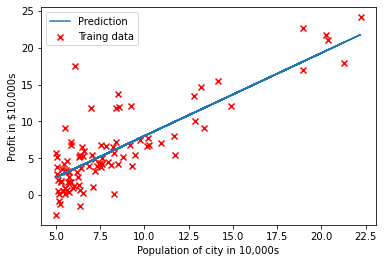

In [15]:
h = X @ p.T
# plt.figure(figsize=(8, 6)) 
plt.scatter(X[:,1], y, marker='x', color='r', label='Traing data')
plt.plot(X[:,1], h, label='Prediction')
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend()

In [16]:
def f(X, y, theta0, theta1):
    z = np.empty((theta0.size, theta1.size))
    for i in range(theta0.size):
        for j in range(theta1.size):
            temp = np.array([theta0[i], theta1[j]]).reshape(1, X.shape[1])
            z[i, j] = compute_cost(X, y, temp)
    return z   

4.480459391893313


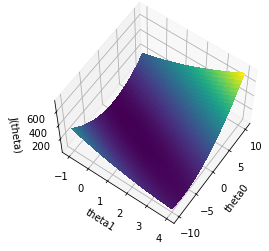

In [17]:
theta0 = np.linspace(-10, 10, 100)
theta1 = np.linspace(-1, 4, 100)

z = f(X, y, theta0, theta1)
print(np.min(z))
t0, t1 = np.meshgrid(theta0, theta1)

fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.contour3D(t0, t1, z, 50, cmap='viridis')
ax.plot_surface(t0, t1, z, cmap='viridis',
                       linewidth=0, antialiased=False)
ax.invert_xaxis()
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('J(theta)')
ax.view_init(60, 35)


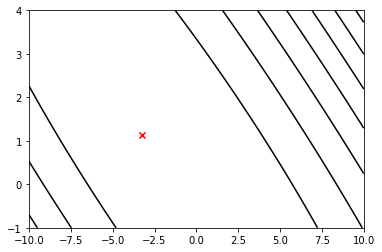

In [18]:
plt.contour(t0, t1, z, colors='black')
plt.scatter(p[0, 0], p[0, 1], marker='x', color='r') # 最低点

Text(0, 0.5, 'Cost')

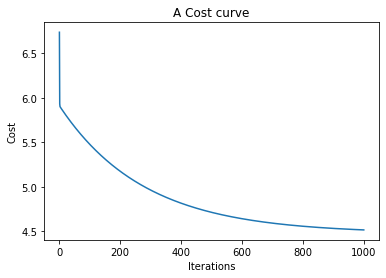

In [19]:
iters = np.linspace(0, 1000, 1000)
plt.plot(iters, cost)
plt.title("A Cost curve")
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [20]:
path2 = 'ex1data2.txt'
data2 = pd.read_csv(path2, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [21]:
data2 = (data2 - data2.mean()) / data2.std() # mean normalization
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [22]:
data2.insert(0, 'One', 1)
data2.head()

,One,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [23]:
cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols-1]
y2 = data2.iloc[:, cols-1:cols]

X2 = X2.to_numpy()
y2 = y2.to_numpy()
theta2 = np.zeros((1, 3))

g2, cost2 = gradientDescent(X2, y2, theta2, iterations, alpha)
g2, compute_cost(X2, y2, g2)

(array([[-1.03191687e-16,  8.78503652e-01, -4.69166570e-02]]),
 0.13070336960771892)

Text(0, 0.5, 'Cost')

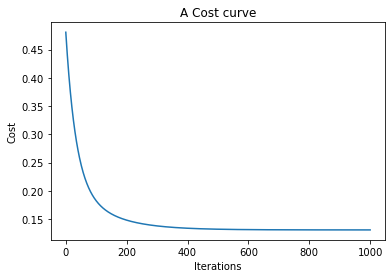

In [24]:
iters = np.linspace(0, 1000, 1000)
plt.plot(iters, cost2)
plt.title("A Cost curve")
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [25]:
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta

In [26]:
final_theta2 = normalEqn(X2, y2)69166570e
final_theta2

array([[-1.04083409e-16],
       [ 8.84765988e-01],
       [-5.31788197e-02]])

In [27]:
# 多变量线性回归：梯度下降的结果是 [-1.03191687e-16,  8.78503652e-01, -4.69166570e-02]